# Washington Shelf Experiment Data

In this exercise we will study data from the Washington Shelf experiment. The data contains transmission signals among other background noise. We will:

* fit a distribution to the background noise
* fit a distribution to the transmission signal
* use the fitted distributions to set up a statistical test to predict presence of a transmission sound and test on new samples

## Reading Data

To construct "idealized" distributions for transmission and background, we have extracted short segments of length 1 sec corresponding to the transmission, and 1 sec of background sound before it. The sampling frequency is 48kHz. We have stored the time series in two `.csv` files: `df_tr.csv` and `df_bg.csv`. The column names correspond to the signal timestamps.



In [1]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import scipy.io as io
import numpy as np
import pandas as pd
import scipy as sp

In [2]:
fs = 48000

In [3]:
# reading transmission dataset
df_tr = pd.read_csv("df_tr.csv")
# reading background dataset
df_bg = pd.read_csv("df_bg.csv")

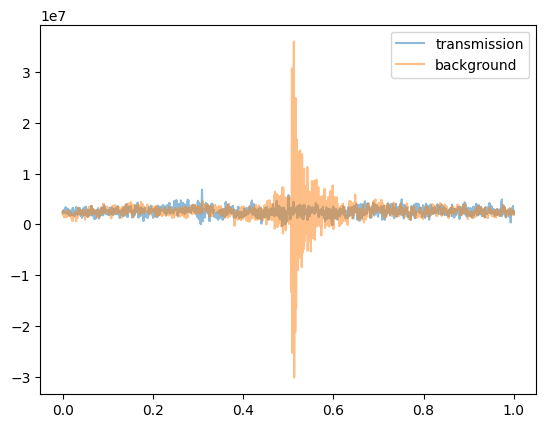

In [4]:
# display 1 pair of transmission and background time series

# select one index to plot the signals
idx = 70

time = np.arange(0, 1, 1. / fs)

plt.plot(time, df_tr.iloc[:,idx], label="transmission", alpha=0.5)
plt.plot(time, df_bg.iloc[:,idx], label="background", alpha=0.5)
plt.legend()

In [5]:
df_tr.head()

,220730142130,220730142430,220730142730,220730143030,220730143330,220730143631,220730143931,220730144230,220730144531,220730144830,...,220731145126,220731145426,220731145727,220731150027,220731150327,220731150626,220731150926,220731151226,220731151456,220731151827
0,1.516175e+06,2.867946e+06,1.236079e+06,1.899786e+06,-748954.054996,1.863252e+06,1.589244e+06,2.959282e+06,4.177093e+06,7.635678e+06,...,4.591149e+06,3.074974e+06,4.639862e+06,4.438923e+06,3.129775e+06,140048.319227,-9.681601e+05,2.453890e+06,5.827228e+06,-1.741470e+06
1,1.473552e+06,2.849679e+06,1.242168e+06,1.942409e+06,-730686.882923,1.832806e+06,1.589244e+06,2.989727e+06,4.140559e+06,7.653945e+06,...,4.578971e+06,3.087152e+06,4.652040e+06,4.408478e+06,3.111508e+06,115692.089796,-9.925163e+05,2.466068e+06,6.247373e+06,-1.790183e+06
2,1.430928e+06,2.849679e+06,1.266524e+06,1.948498e+06,-700241.596135,1.796272e+06,1.564888e+06,3.007994e+06,4.097936e+06,7.629589e+06,...,4.633773e+06,3.062796e+06,4.652040e+06,4.414567e+06,3.141954e+06,103513.975081,-1.053407e+06,2.423445e+06,6.649251e+06,-1.844984e+06
3,1.363949e+06,2.807055e+06,1.272613e+06,1.966766e+06,-651529.137273,1.753649e+06,1.595333e+06,2.953193e+06,4.104025e+06,7.629589e+06,...,4.676396e+06,3.038440e+06,4.639862e+06,4.445012e+06,3.099330e+06,73068.688292,-1.114297e+06,2.399089e+06,6.971971e+06,-1.863252e+06
4,1.370038e+06,2.752254e+06,1.242168e+06,1.978944e+06,-681974.424062,1.704936e+06,1.625778e+06,3.001905e+06,4.122292e+06,7.599144e+06,...,4.658129e+06,3.032351e+06,4.615505e+06,4.426745e+06,3.007994e+06,42623.401504,-1.114297e+06,2.435623e+06,7.300780e+06,-1.851073e+06


## Filtering Data

Since the data is quite noisy, and sometimes the transmission is not visible. We will use a filter to limit the frequency content to (3450Hz, 3550Hz) range. 

In [6]:
import scipy as sp

In [7]:
def BandPass(inputSignal, bandLimits, freqSample):
    sos = sp.signal.butter(4, bandLimits, 'bandpass', fs = freqSample, output='sos')
    outputSignal = sp.signal.sosfilt(sos,inputSignal)
    
    return outputSignal

In [8]:
flimits = [3450, 3550]
signal_tr_filt = BandPass( df_tr.iloc[:,idx], flimits, fs)
signal_bg_filt = BandPass( df_bg.iloc[:,idx], flimits, fs)

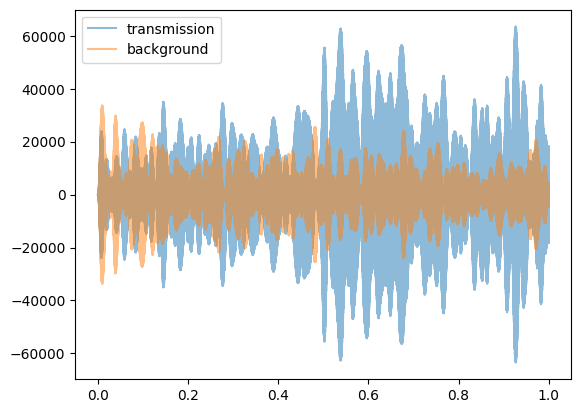

In [9]:
plt.plot(time, signal_tr_filt, alpha=0.5, label = "transmission")
plt.plot(time, signal_bg_filt, alpha=0.5, label = "background")
plt.legend()
plt.show()

### TODO: Filter all the data

## Computing RMS

Compute the Root Mean Square for one 1 sec signal, and convert to dB.

In [10]:
# RMS in dB for one example
rms_tr = 20*np.log10(np.sqrt(np.mean(np.square(signal_tr_filt.astype('float')))))
print(rms_tr)

rms_bg = 20*np.log10(np.sqrt(np.mean(np.square(signal_bg_filt.astype('float')))))
print(rms_bg)

85.25384099378131
78.42848413346391


**TODO:** Compute RMS and convert to dB for each 1 sec signal.

In [11]:
bg_all, tr_all = [], []

for col in df_bg:

    bg_ch4_filt = BandPass(df_bg[col], flimits, fs)
    bg_all.append(np.sqrt(np.mean(np.square(bg_ch4_filt.astype('float')))))


for col in df_tr:

    tr_ch4_filt = BandPass(df_tr[col], flimits, fs)
    tr_all.append(np.sqrt(np.mean(np.square(tr_ch4_filt.astype('float')))))

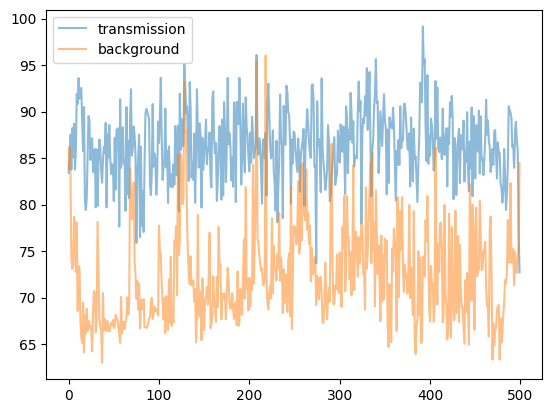

In [12]:
plt.plot(20*np.log10(tr_all), alpha=0.5, label="transmission")
plt.plot(20*np.log10(bg_all), alpha=0.5, label="background")
plt.legend()
plt.show()

**TODO:** Plot the histograms of the RMS dB values for the transmission and background signals. What type of distribution do they follow?

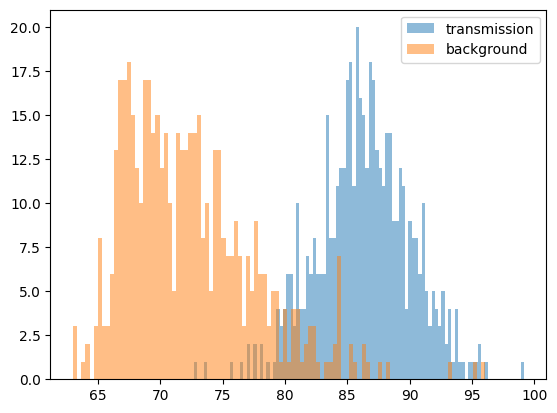

In [13]:
_ = plt.hist(20*np.log10(tr_all), bins=100, alpha=0.5, label="transmission")
_ = plt.hist(20*np.log10(bg_all), bins=100, alpha=0.5, label="background")
plt.legend()

## Fitting Distributions

In [14]:
from scipy import stats

In [15]:
def plot_skewnorm_density_L(a, scale, loc):
  h = plt.hist(X, bins=100, density=True, alpha=0.5)

  # evaluate the function at the histogram bins
  skewnorm_density = stats.skewnorm.pdf(h[1], a=a, scale=scale, loc=loc)

  # evaluation the function at the observations
  skewnorm_likelihood = stats.skewnorm.pdf(X, a=a, scale=scale, loc=loc)
  L = np.sum(np.log(skewnorm_likelihood))

  plt.plot(h[1], skewnorm_density)
  plt.title(f"Log-Likelihood {L:.10f}")

In [16]:
from ipywidgets import interact
import ipywidgets as widgets

TODO: Select starting values for the widget.

In [17]:
X = 20*np.log10(bg_all)
# X = 20*np.log10(tr_all)

In [18]:
# start from the sample mean and standard deviation
shape = 0
loc = np.mean(X)
scale = np.std(X)
print(loc)
print(scale)

72.40315536298968
5.20728820070671


In [19]:
shape_slider = widgets.FloatSlider(
    value=shape,
    min=shape-10,
    max=shape+10,
    step=0.01,
    description='Shape:',
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

scale_slider = widgets.FloatSlider(
    value=scale,
    min=scale-10,
    max=scale+10,
    step=0.01,
    description='Scale:',
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)

loc_slider = widgets.FloatSlider(
    value=loc,
    min=loc-10,
    max=loc+10,
    step=0.01,
    description='Location:',
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)


**TODO** Select parameters to fit the distribution.

In [20]:
out = interact(plot_skewnorm_density_L, a = shape_slider, scale = scale_slider, loc = loc_slider)

interactive(children=(FloatSlider(value=0.0, description='Shape:', max=10.0, min=-10.0, step=0.01), FloatSlide…